# Develop A Neural Network That Can Read Handwriting
## Anish Dhondi

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

## Loading the dataset

In [2]:
mnist= tf.keras.datasets.mnist

## Dividing the images and their outputs into x_train and x_test sets

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


## Checking the data set images, which needed to be identified by the neural network

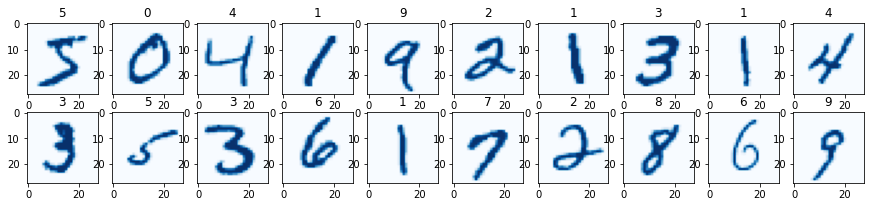

In [9]:
fig=plt.figure(figsize=(15,3))
for i in range(20):
  ax=fig.add_subplot(2,10,i+1)
  ax.imshow(np.squeeze(x_train[i]),cmap='Blues')
  ax.set_title(y_train[i])

## Printing the data images into metrics form

In [10]:
print(x_train.shape)
print(x_train[0])

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

## Normalizing the matrix array of number images

In [11]:
xtrain = x_train/255.0
xtest = x_test/255.0

## Flattening the 2-dimensional array into one dimensional array or a single column; which will behave as 1st inpur layer for neural network

In [12]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation ='relu'),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Using of AdamOptimizer

In [14]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss ='sparse_categorical_crossentropy',
            metrics=['accuracy'])

## Fitting of the training data into the model for 5 iterations

In [15]:
model.fit(xtrain,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2608 - accuracy: 0.9250
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1139 - accuracy: 0.9671
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0784 - accuracy: 0.9763
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0586 - accuracy: 0.9822
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0462 - accuracy: 0.9854


## 98% Accuracy achieved with 5 iteration

### Fitting of the training data into the model for 9 iterations

In [16]:
model.fit(xtrain,y_train, epochs=9)

Epoch 1/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0369 - accuracy: 0.9882
Epoch 2/9
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0291 - accuracy: 0.9908
Epoch 3/9
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0242 - accuracy: 0.9926
Epoch 4/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0210 - accuracy: 0.9933
Epoch 5/9
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0161 - accuracy: 0.9950
Epoch 6/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0144 - accuracy: 0.9952
Epoch 7/9
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0125 - accuracy: 0.9962
Epoch 8/9
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0108 - accuracy: 0.9967
Epoch 9/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0081 - accuracy: 0.9975


## 99% Accuracy achieved with 9 iterations

In [17]:
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 2s 4ms/step - loss: 22.3801 - accuracy: 0.9755
[22.380125045776367, 0.9754999876022339]


## 97 % of total accuracy of our neural network has been achieved

In [18]:
history=model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 11s 6ms/step - loss: 5.4094 - accuracy: 0.9889 - val_loss: 1.2963 - val_accuracy: 0.9958
Epoch 2/10
1688/1688 [==============================] - 6s 4ms/step - loss: 1.8227 - accuracy: 0.9943 - val_loss: 1.0672 - val_accuracy: 0.9957
Epoch 3/10
1688/1688 [==============================] - 11s 7ms/step - loss: 1.8526 - accuracy: 0.9945 - val_loss: 4.8758 - val_accuracy: 0.9902
Epoch 4/10
1688/1688 [==============================] - 6s 4ms/step - loss: 1.7529 - accuracy: 0.9946 - val_loss: 2.2630 - val_accuracy: 0.9925
Epoch 5/10
1688/1688 [==============================] - 8s 5ms/step - loss: 2.0668 - accuracy: 0.9944 - val_loss: 3.4234 - val_accuracy: 0.9928
Epoch 6/10
1688/1688 [==============================] - 6s 3ms/step - loss: 1.6762 - accuracy: 0.9949 - val_loss: 4.2706 - val_accuracy: 0.9882
Epoch 7/10
1688/1688 [==============================] - 6s 3ms/step - loss: 1.8521 - accuracy: 0.9947 - val_loss: 4.8782 - val_accurac

## Plotting Accuracy of Model

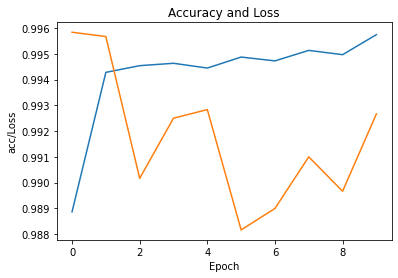

In [19]:
plt.title("Accuracy and Loss")
plt.xlabel("Epoch")
plt.ylabel("acc/Loss")
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history["val_accuracy"],label='val')
plt.show()

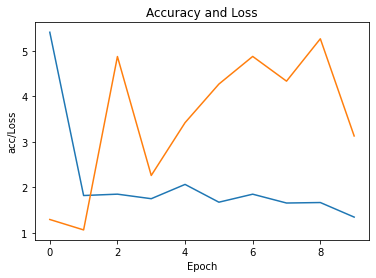

In [20]:
plt.title("Accuracy and Loss")
plt.xlabel("Epoch")
plt.ylabel("acc/Loss")
plt.plot(history.history['loss'],label='acc')
plt.plot(history.history["val_loss"],label='val')
plt.show()

## Testing Our Model

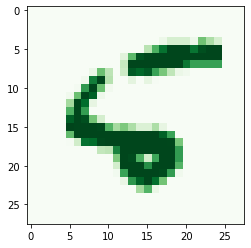

In [35]:
plt.imshow(np.squeeze(x_test[8]),cmap="Greens")


In [36]:
prediction=model.predict(x_test)
print(np.argmax(prediction[8]))

5


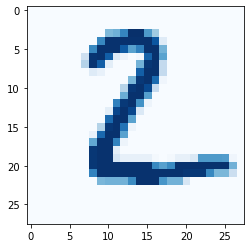

In [30]:
plt.imshow(np.squeeze(x_test[1]),cmap="Blues")

In [24]:
prediction=model.predict(x_test)
print(np.argmax(prediction[1]))

2



## Thank You